In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

sns.set() # this allows me to use seaborn package as part of matplotlib

In [4]:
rand_state = 500

# Data Preprocessing

In [5]:
df = pd.read_csv("nyc-rolling-sales.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

In [7]:
df.isnull().sum() / len(df)

Unnamed: 0                        0.0
BOROUGH                           0.0
NEIGHBORHOOD                      0.0
BUILDING CLASS CATEGORY           0.0
TAX CLASS AT PRESENT              0.0
BLOCK                             0.0
LOT                               0.0
EASE-MENT                         0.0
BUILDING CLASS AT PRESENT         0.0
ADDRESS                           0.0
APARTMENT NUMBER                  0.0
ZIP CODE                          0.0
RESIDENTIAL UNITS                 0.0
COMMERCIAL UNITS                  0.0
TOTAL UNITS                       0.0
LAND SQUARE FEET                  0.0
GROSS SQUARE FEET                 0.0
YEAR BUILT                        0.0
TAX CLASS AT TIME OF SALE         0.0
BUILDING CLASS AT TIME OF SALE    0.0
SALE PRICE                        0.0
SALE DATE                         0.0
dtype: float64

In [8]:
del df['Unnamed: 0']

In [9]:
df.drop('EASE-MENT', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GROSS SQUARE FEET                 84548 non-null object
YEAR BUILT                        84548 non-null int64
TAX

In [11]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [12]:
df.columns = ['borough', 'neighborhood','building_class category','tax_class_at_present', 'block', 'lot','building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units','land_square_feet', 'gross_square_feet', 'year_built','tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
borough                           84548 non-null int64
neighborhood                      84548 non-null object
building_class category           84548 non-null object
tax_class_at_present              84548 non-null object
block                             84548 non-null int64
lot                               84548 non-null int64
building_class_at_present         84548 non-null object
address                           84548 non-null object
apartment_number                  84548 non-null object
zip_code                          84548 non-null int64
residential_units                 84548 non-null int64
commercial_units                  84548 non-null int64
total_units                       84548 non-null int64
land_square_feet                  84548 non-null object
gross_square_feet                 84548 non-null object
year_built                        84548 non-null int64
tax

In [13]:
numer = ['land_square_feet','gross_square_feet', 'sale_price', 'borough']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
borough                           84548 non-null int64
neighborhood                      84548 non-null object
building_class category           84548 non-null object
tax_class_at_present              84548 non-null object
block                             84548 non-null int64
lot                               84548 non-null int64
building_class_at_present         84548 non-null object
address                           84548 non-null object
apartment_number                  84548 non-null object
zip_code                          84548 non-null int64
residential_units                 84548 non-null int64
commercial_units                  84548 non-null int64
total_units                       84548 non-null int64
land_square_feet                  58296 non-null float64
gross_square_feet                 56936 non-null float64
year_built                        84548 non-null int64
t

In [15]:
categ = ['neighborhood', 'building_class category', 'tax_class_at_present', 'building_class_at_present', 'building_class_at_time_of_sale', 'tax_class_at_time_of_sale']
for col in categ:
    df[col] = df[col].astype('category')

In [16]:
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
borough                           84548 non-null int64
neighborhood                      84548 non-null category
building_class category           84548 non-null category
tax_class_at_present              84548 non-null category
block                             84548 non-null int64
lot                               84548 non-null int64
building_class_at_present         84548 non-null category
address                           84548 non-null object
apartment_number                  84548 non-null object
zip_code                          84548 non-null int64
residential_units                 84548 non-null int64
commercial_units                  84548 non-null int64
total_units                       84548 non-null int64
land_square_feet                  58296 non-null float64
gross_square_feet                 56936 non-null float64
year_built                        84548 non-null

In [18]:
df['sale_year']    = df['sale_date'].dt.year
df['sale_month']   = df['sale_date'].dt.month
df['sale_quarter'] = df['sale_date'].dt.quarter
df['sale_day']     = df['sale_date'].dt.day
df['sale_weekday'] = df['sale_date'].dt.weekday

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 25 columns):
borough                           84548 non-null int64
neighborhood                      84548 non-null category
building_class category           84548 non-null category
tax_class_at_present              84548 non-null category
block                             84548 non-null int64
lot                               84548 non-null int64
building_class_at_present         84548 non-null category
address                           84548 non-null object
apartment_number                  84548 non-null object
zip_code                          84548 non-null int64
residential_units                 84548 non-null int64
commercial_units                  84548 non-null int64
total_units                       84548 non-null int64
land_square_feet                  58296 non-null float64
gross_square_feet                 56936 non-null float64
year_built                        84548 non-null

In [72]:
print("Number of duplicates in the given dataset = {0}".format(sum(df.duplicated(df.columns))))
df = df.drop_duplicates(df.columns, keep='last')
print("Number of duplicates in the given dataset after cleanup = {0}".format(sum(df.duplicated(df.columns))))

Number of duplicates in the given dataset = 765
Number of duplicates in the given dataset after cleanup = 0


In [73]:
variables = df.columns
count = []

for variable in variables:
    length = df[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(df), 2)

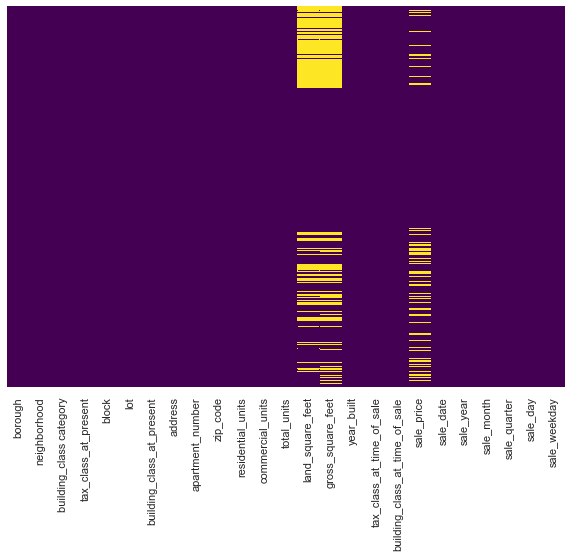

In [74]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [75]:
df = df[df['sale_price'].notnull()]

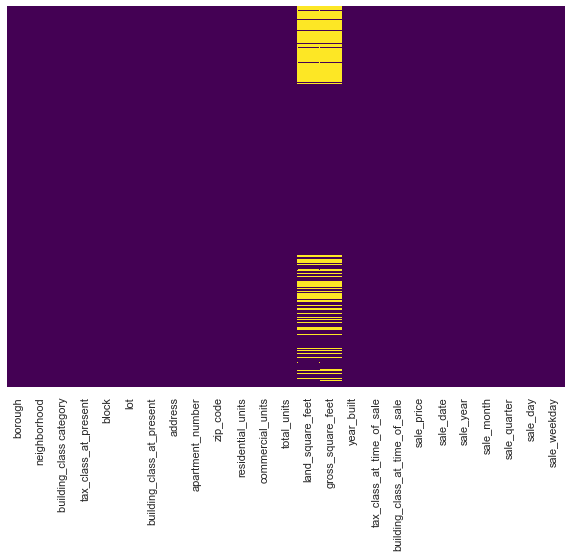

In [76]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [77]:
df = df[(df['sale_price'] > 100000) & (df['sale_price'] < 5000000)]

In [78]:
df = df[df['land_square_feet'].notnull()] 
df = df[df['gross_square_feet'].notnull()] 

In [20]:
df.columns

Index(['borough', 'neighborhood', 'building_class category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'apartment_number', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'land_square_feet',
       'gross_square_feet', 'year_built', 'tax_class_at_time_of_sale',
       'building_class_at_time_of_sale', 'sale_price', 'sale_date',
       'sale_year', 'sale_month', 'sale_quarter', 'sale_day', 'sale_weekday'],
      dtype='object')

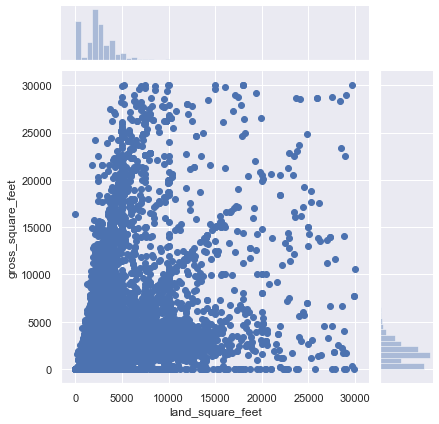

In [27]:
sns.jointplot(x='land_square_feet', 
              y='gross_square_feet', 
              data=df[(df['land_square_feet']<=30000)& 
                      (df['gross_square_feet']<=30000)], 
              kind='scatter')

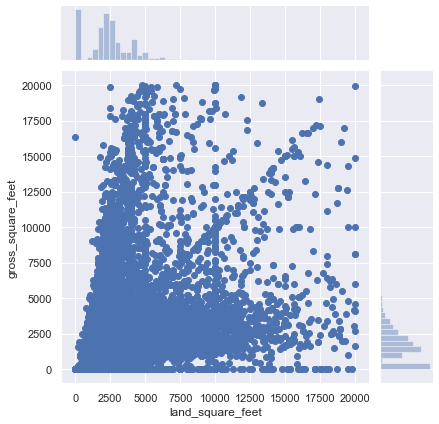

In [26]:
sns.jointplot(x='land_square_feet',
              y='gross_square_feet', 
              data=df[(df['land_square_feet']<=20000)& 
                      (df['gross_square_feet']<=20000)], 
              kind='scatter')

In [79]:
df = df[df['gross_square_feet'] < 20000]
df = df[df['land_square_feet'] < 20000]

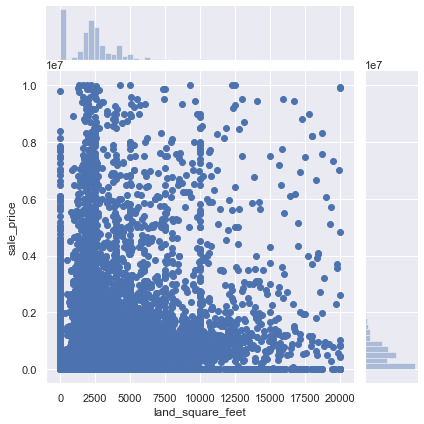

In [30]:
sns.jointplot(x='land_square_feet',
              y='sale_price', 
              data=df[(df['land_square_feet']<=20000)& 
                      (df['sale_price']<=10000000)], 
              kind='scatter')

# Presence of Heteroskedasticity

Almost anything regressed on sale price will result in a heteroskedasticity. Even by looking at the histogram below you can see the sever skewness associated with sales prices below 5,000,000.

We take the log of sales to solve to for the heteroskedasticity.

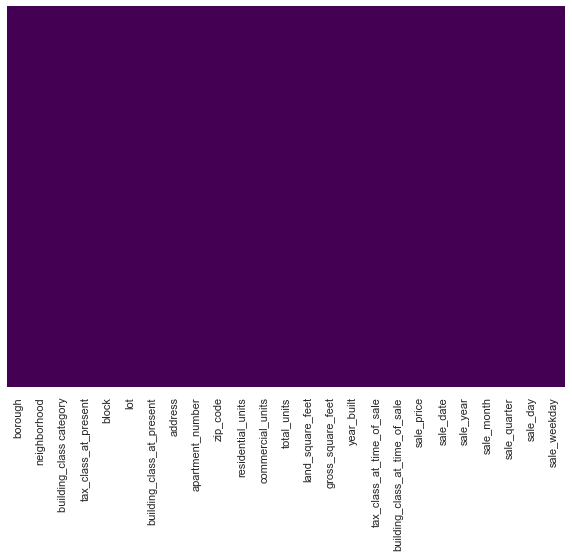

In [80]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [81]:
print('Length of dataset after cleanup = {0}'.format(len(df)))

Length of dataset after cleanup = 34519


# Heteroskedasticity is clearly an issue.

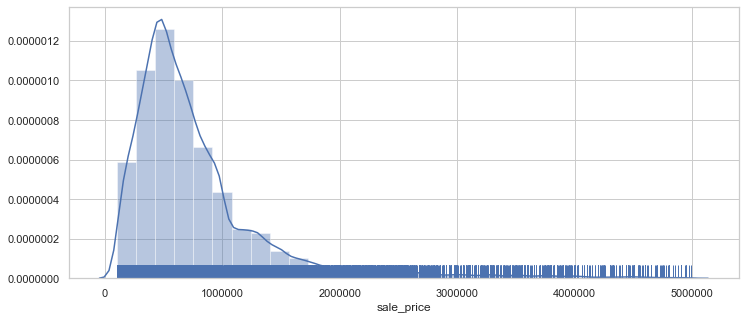

In [83]:
plt.figure(figsize=(12,5))
sns.distplot(df['sale_price'], bins=30 , rug=True)
plt.show()

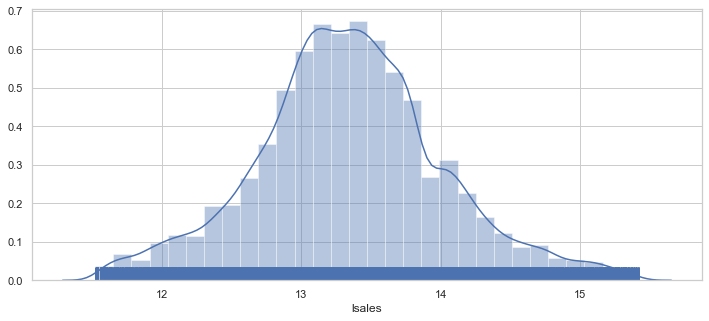

In [84]:
plt.figure(figsize=(12,5))
df['lsales']= np.log(df['sale_price'])
sns.distplot(df['lsales'], bins=30 , rug=True)
plt.show()

By taking the log of sales, we can get a normal distribution to derive meaningful conclusions from.

In [86]:
sns.set(style="darkgrid")

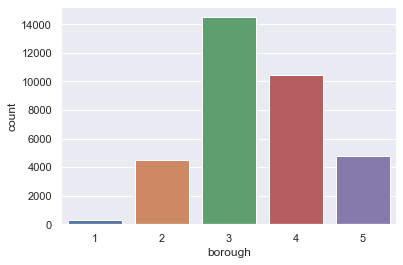

In [87]:
ax = sns.countplot(x="borough", data=df)

In [32]:
df2 = pd.read_csv("nyc-rolling-sales.csv")
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2.columns = ['borough', 'neighborhood','building_class_category','tax_class_at_present', 'block', 'lot', 'ease_ment','building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units','land_square_feet', 'gross_square_feet', 'year_built','tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date']

In [42]:
df2['borough'][df2['borough'] == 1] = 'Manhattan'
df2['borough'][df2['borough'] == 2] = 'Bronx'
df2['borough'][df2['borough'] == 3] = 'Brooklyn'
df2['borough'][df2['borough'] == 4] = 'Queens'
df2['borough'][df2['borough'] == 5] = 'Staten Island'

df2['sale_price'] = pd.to_numeric(df2['sale_price'], errors='coerce')
df2['land_square_feet'] = pd.to_numeric(df2['land_square_feet'], errors='coerce')
df2['gross_square_feet']= pd.to_numeric(df2['gross_square_feet'], errors='coerce')

# Both TAX CLASS attributes should be categorical
df2['tax_class_at_time_of_sale'] = df2['tax_class_at_time_of_sale'].astype('category')
df2['tax_class_at_present'] = df2['tax_class_at_present'].astype('category')

Not sure why I can't get the below plot to work. If you have any suggestions, please let me know.

In [69]:
# average price of a house in each borough
# box plot
df2 = df2[df2['sale_price'].notnull()]
df2 = df2[(df2['sale_price'] > 100000) & (df2['sale_price'] < 5000000)]

trace0 = go.Box(
    y=df2.sale_price[df2.borough == 'Manhattan' ],
    name = 'Manhattan',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=df2.sale_price[df2.borough ==  'Bronx' ],
    name = 'Bronx',
    marker = dict(
        color = 'rgb(8,81,156)',
    )
)
trace2 = go.Box(
    y=df2.sale_price[df2.borough ==  'Brooklyn' ],
    name = 'Brooklyn',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace3 = go.Box(
    y=df2.sale_price[df2.borough ==  'Queens' ],
    name = 'Queens',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
trace4 = go.Box(
    y=df2.sale_price[df2.borough ==  'Staten Island' ],
    name = 'Staten Island',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)

dat = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Housing Prices in Boroughs',
    xaxis=dict(
        title='Borough'
    ),
    yaxis=dict(
        title='Sale Price'
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)'
)

fig = go.Figure(data=dat, layout=layout)
py.iplot(fig)
plt.show()

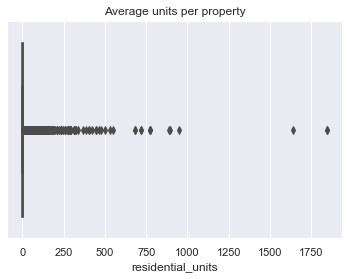

In [45]:
sns.boxplot(x='residential_units',data=df)
plt.title('Average units per property')
plt.show()

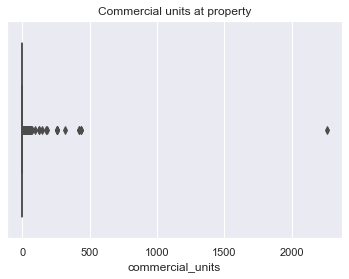

In [47]:
sns.boxplot(x='commercial_units',data=df)
plt.title('Commercial units at property')
plt.show()

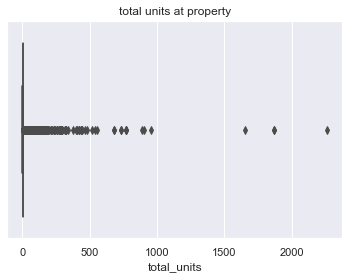

In [48]:
sns.boxplot(x='total_units',data=df)
plt.title('total units at property')
plt.show()

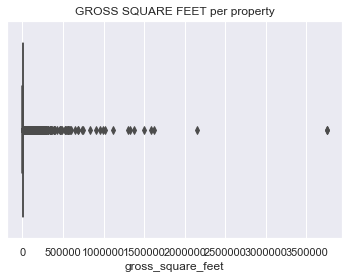

In [50]:
sns.boxplot(x='gross_square_feet',data=df)
plt.title('GROSS SQUARE FEET per property')
plt.show()

In [52]:
print("Uneqaul values for total units:", 
      (df["total_units"] != df['commercial_units'] + 
       df['residential_units']).sum())

Uneqaul values for total units: 2650


In [54]:
df[df["total_units"] != df['commercial_units'] + 
   df['residential_units']]['total_units'].value_counts()

1      2629
2        12
3         4
117       1
9         1
24        1
14        1
4         1
Name: total_units, dtype: int64

In [59]:
df[(df["total_units"] != df['commercial_units'] + 
        df['residential_units']) & 
       (df["total_units"]==1)]['building_class category'].value_counts()[:5]

44 CONDO PARKING                               1339
43 CONDO OFFICE BUILDINGS                       465
47 CONDO NON-BUSINESS STORAGE                   351
45 CONDO HOTELS                                 211
46 CONDO STORE BUILDINGS                        151
Name: building_class category, dtype: int64

In [60]:
df[df['year_built']<1800]['year_built'].value_counts()

0       6970
1111       1
1680       1
Name: year_built, dtype: int64

In [61]:
df[df['year_built']<1800]['building_class category'].value_counts()[:15]

13 CONDOS - ELEVATOR APARTMENTS                3082
05 TAX CLASS 1 VACANT LAND                     1171
04 TAX CLASS 1 CONDOS                           424
31 COMMERCIAL VACANT LAND                       419
44 CONDO PARKING                                387
12 CONDOS - WALKUP APARTMENTS                   275
29 COMMERCIAL GARAGES                           255
15 CONDOS - 2-10 UNIT RESIDENTIAL               251
17 CONDO COOPS                                  183
47 CONDO NON-BUSINESS STORAGE                   118
41 TAX CLASS 4 - OTHER                          109
43 CONDO OFFICE BUILDINGS                        93
45 CONDO HOTELS                                  53
46 CONDO STORE BUILDINGS                         39
48 CONDO TERRACES/GARDENS/CABANAS                25
Name: building_class category, dtype: int64

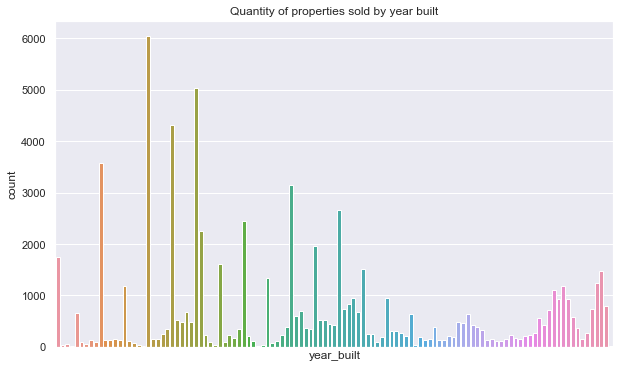

In [62]:
plt.figure(figsize=(10,6))
plotd=sns.countplot(x=df[df['year_built']>1900]['year_built'])
#tick_spacing=1 # set spacing for each tick
#plotd.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
#plotd.set_xlim([1900, 2020])
plt.tick_params(labelbottom=False)
plt.xticks(rotation=30) 
plt.title("Quantity of properties sold by year built")
plt.show()

Most of the older lots and buildings are the ones that are sold most in the dataset. That element should be considered in the analysis.

/Users/parkerjenks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/Users/parkerjenks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



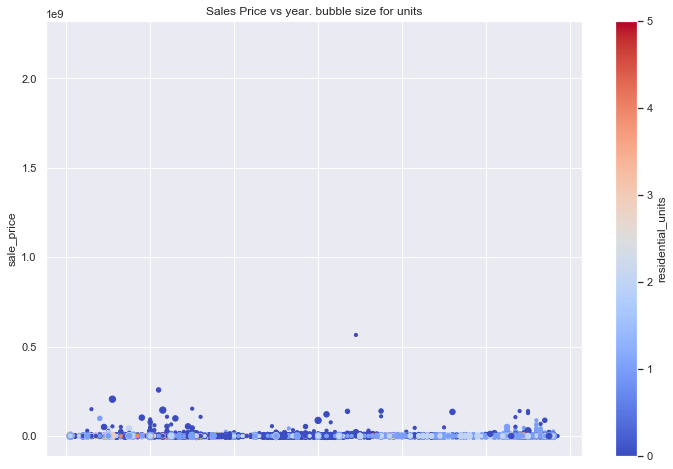

In [71]:
df[df['year_built']>1900][df['residential_units']<=5].plot.scatter(x='year_built', y='sale_price', c='residential_units', 
                                                                   cmap='coolwarm',figsize=(12,8),s=df[df['year_built']>1900][df['sale_price']<=50000000][df['residential_units']<=5]['residential_units']*10)
plt.title('Sales Price vs year. bubble size for units')
plt.show()

I'd love to get this graph to actaully appear like I would expect. However, I can't seem to get it to shrink the y axis. Again, if you have any suggestions, I'm all ears.